In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = 'FP com 2024.csv'  # Asegúrate de que el archivo CSV esté en el mismo directorio que tu notebook o proporciona la ruta completa
df = pd.read_csv(file_path)


Evolución por cobros totales (agrupados por Mes-año):
  Mes-año          Premio  % del total
0  abr-24  166,727,380.82    12.181557
1  ago-24  217,790,650.70    15.912378
2  ene-24  111,554,087.29     8.150446
3  feb-24  126,968,298.09     9.276650
4  jul-24  217,374,540.04    15.881976
5  jun-24  195,284,186.46    14.267995
6  mar-24  150,887,263.96    11.024235
7  may-24  182,100,573.54    13.304764


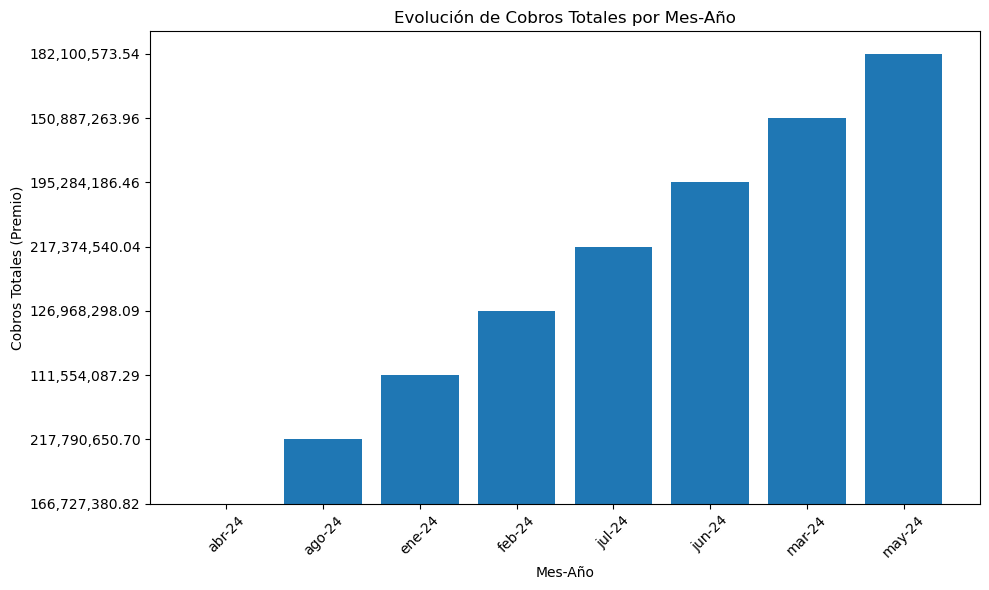

In [26]:
#1 Evolución por cobros totales (sumatoria de Columna 19 Premio, agrupados por Columna 5 Mes-año)
evolucion_cobros = df.groupby(df.columns[4])[df.columns[18]].sum().reset_index()
evolucion_cobros['% del total'] = (evolucion_cobros[df.columns[18]] / evolucion_cobros[df.columns[18]].sum()) * 100

# Formatear la columna "Premio" para mostrar con separador de miles y sin notación científica
evolucion_cobros[df.columns[18]] = evolucion_cobros[df.columns[18]].apply(lambda x: "{:,.2f}".format(x))

print("\nEvolución por cobros totales (agrupados por Mes-año):")
print(evolucion_cobros)

# Gráfico de barras para la evolución de cobros totales
plt.figure(figsize=(10,6))
plt.bar(evolucion_cobros[df.columns[4]], evolucion_cobros[df.columns[18]])
plt.title('Evolución de Cobros Totales por Mes-Año')
plt.xlabel('Mes-Año')
plt.ylabel('Cobros Totales (Premio)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cantidad por ramo (conteo de filas agrupados por Ramo):
    Ramo  Premio  % del total
0      1     885     0.990531
1      2      15     0.016789
2      4   25235    28.244130
3      5      22     0.024623
4      6     917     1.026347
5      7     352     0.393974
6      8    3796     4.248651
7      9      80     0.089540
8     12   22986    25.726949
9     13      28     0.031339
10    18      32     0.035816
11    19   26737    29.925234
12    22       3     0.003358
13    24    2332     2.610078
14    25     370     0.414120
15    35     546     0.611107
16    36    2526     2.827211
17    37     167     0.186914
18    44    1611     1.803103
19    80     706     0.790186


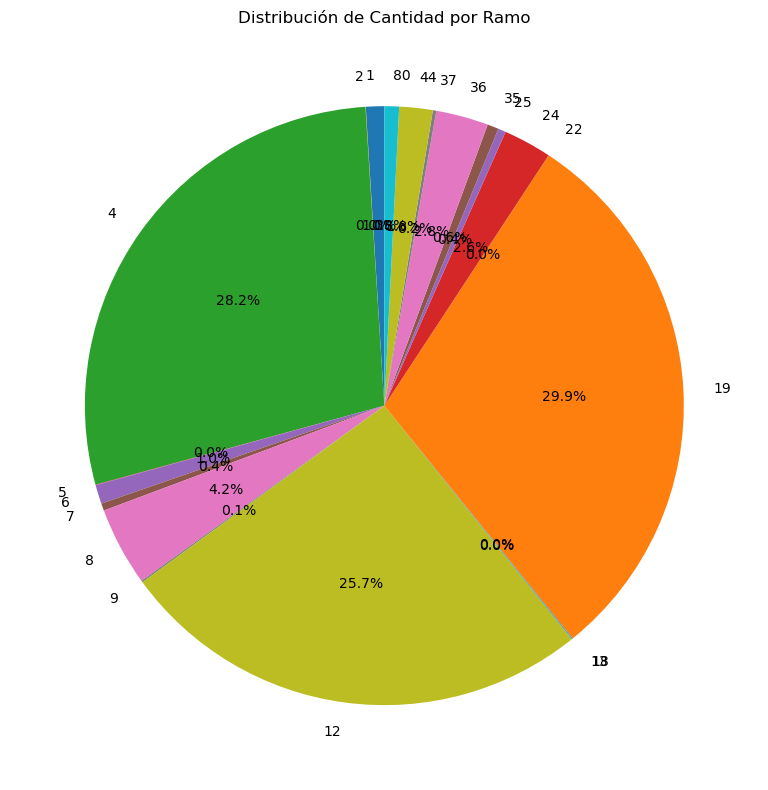

In [15]:
#2 Cantidad por ramo (conteo de filas de Columna 19 Premio, agrupados por Columna 9 Ramo)
cantidad_por_ramo = df.groupby(df.columns[8])[df.columns[18]].count().reset_index()
cantidad_por_ramo['% del total'] = (cantidad_por_ramo[df.columns[18]] / cantidad_por_ramo[df.columns[18]].sum()) * 100
print("\nCantidad por ramo (conteo de filas agrupados por Ramo):")
print(cantidad_por_ramo)

# Gráfico de torta para la cantidad por ramo
plt.figure(figsize=(8,8))
plt.pie(cantidad_por_ramo[df.columns[18]], labels=cantidad_por_ramo[df.columns[8]], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Cantidad por Ramo')
plt.tight_layout()
plt.show()


Cantidad por forma de pago (sumatoria agrupados por Origen Ingreso):
   Origen Ingreso          Premio  % del total
0            AFIP   55,828,372.37     4.078973
1            AJUS   -1,939,153.74    -0.141680
2             ART    1,527,819.09     0.111627
3            DEBI  754,016,000.68    55.090463
4            DESC      657,650.53     0.048050
5            DEVO   -2,043,727.74    -0.149320
6            EXPR   18,062,727.23     1.319712
7            LINK   27,039,510.53     1.975580
8            PA24    1,130,045.01     0.082564
9            PAGF  305,871,515.70    22.347806
10           PLUS      759,796.28     0.055513
11            PMC   72,453,289.03     5.293635
12           PNET    3,647,653.05     0.266507
13           PROD   60,194,861.10     4.398001
14           PRON       51,501.30     0.003763
15           RAPI   54,523,252.63     3.983617
16           RIPS    3,032,419.80     0.221557
17           WEBS   13,873,448.05     1.013632


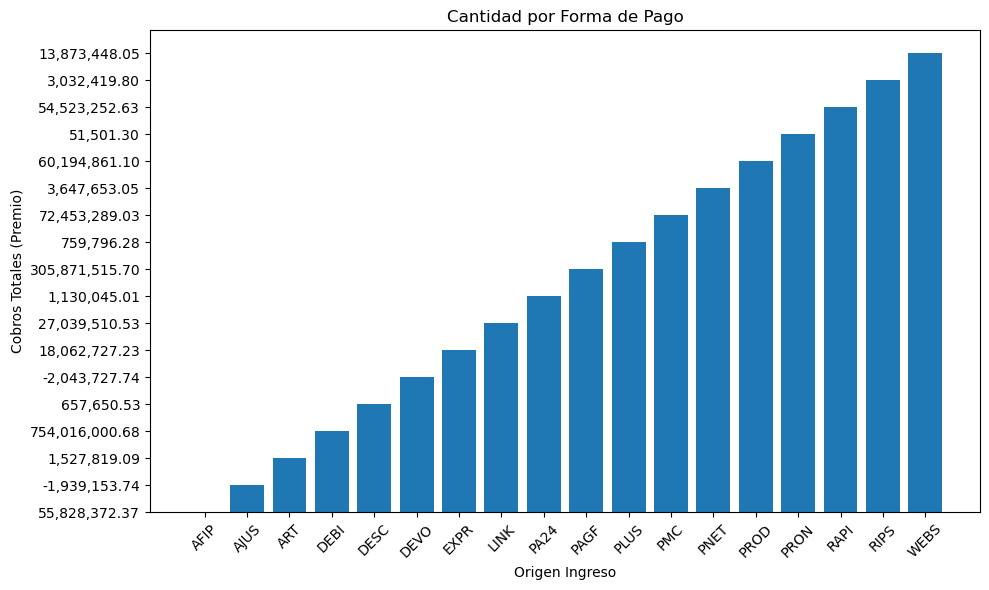

In [24]:
#3 Cantidad por forma de pago (sumatoria de Columna 19 Premio, agrupados por Columna 7 Origen Ingreso)
cantidad_por_forma_pago = df.groupby(df.columns[6])[df.columns[18]].sum().reset_index()
cantidad_por_forma_pago['% del total'] = (cantidad_por_forma_pago[df.columns[18]] / cantidad_por_forma_pago[df.columns[18]].sum()) * 100

# Formatear la columna "Premio" para mostrar con separador de miles y sin notación científica
cantidad_por_forma_pago[df.columns[18]] = cantidad_por_forma_pago[df.columns[18]].apply(lambda x: "{:,.2f}".format(x))


print("\nCantidad por forma de pago (sumatoria agrupados por Origen Ingreso):")
print(cantidad_por_forma_pago)




# Gráfico de barras para la cantidad por forma de pago
plt.figure(figsize=(10,6))
plt.bar(cantidad_por_forma_pago[df.columns[6]], cantidad_por_forma_pago[df.columns[18]])
plt.title('Cantidad por Forma de Pago')
plt.xlabel('Origen Ingreso')
plt.ylabel('Cobros Totales (Premio)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


20 asegurados que pagan más pólizas:
                         Asegurado  PÃ³liza
3991     YULIANI PAUL GENARO DAVID      306
3511  SERRANO VERONICA GUILLERMINA      145
910                  CINELLI DIEGO      138
3461        SCHMIDT ROBERTO CARLOS      137
1561          GARITA ANGELES BELEN      137
83    ALARCON PABLO ROLANDO GASTON      136
4015            ZARDIN MIRTA MABEL      123
167            ALVAREZ JULIO CESAR      111
2184                 LOPEZ IGNACIO      110
2944       PEREZ LEONARDO EZEQUIEL      109
1889                   HOLTZ JESUS      108
2807         PABLO SEBASTIAN SAGER      102
592             BUCOSSI MARIO OMAR       99
3669           SVERDLIK ELIAN LEON       99
3773     TRAVESARO ALEJANDRO DARIO       99
2775          ORREGO GENARO ANDRES       95
1421  FLORES HEIN GUILLERMO HERNAN       95
1260     ESCUDERO PATRICIO GABRIEL       95
3288                  ROSATI BRUNO       94
3626                 STAUBER MARIA       94


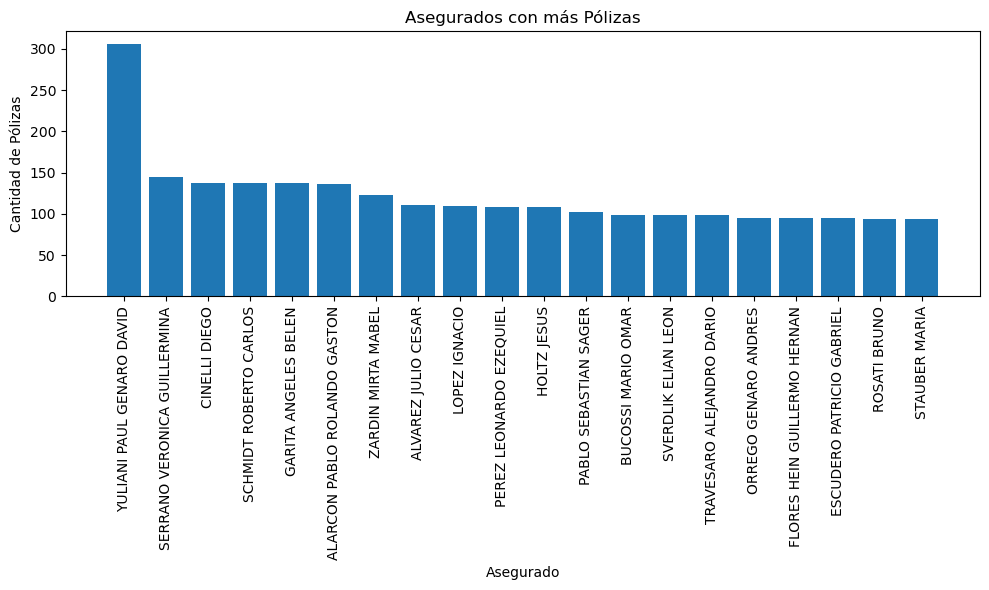

In [22]:
#4 20 asegurados que pagan más pólizas (20 asegurados de Columna 8 Asegurado - que tengan más pólizas en Columna 10 Poliza)
asegurados_mas_polizas = df.groupby(df.columns[7])[df.columns[9]].count().reset_index().sort_values(by=df.columns[9], ascending=False).head(20)
print("\n20 asegurados que pagan más pólizas:")
print(asegurados_mas_polizas)

# Gráfico de barras para los asegurados con más pólizas
plt.figure(figsize=(10,6))
plt.bar(asegurados_mas_polizas[df.columns[7]], asegurados_mas_polizas[df.columns[9]])
plt.title('Asegurados con más Pólizas')
plt.xlabel('Asegurado')
plt.ylabel('Cantidad de Pólizas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


20 asegurados que pagan el premio más alto:
                                              Asegurado      Premio
1829                                 GUTTE JOSE ENRIQUE  9216667.23
1943                                   INTELEKTRON S.A.  5733972.95
3767                               TOUR VAN FULL S.R.L.  5252612.24
3461                             SCHMIDT ROBERTO CARLOS  5117737.96
2138                                        LIPLAC S.A.  5036767.67
1174                               DISTRIBUIDORA GAS SA  4775569.21
395                              BASILE NAHUEL JEREMIAS  4650848.79
3042  QUILSA . COM. AR SH DE POZZI ALEJANDRO DANIEL ...  3940076.99
1934                             INGENIERIA DABE S.R.L.  3907697.57
1118                           DI STASIO GUSTAVO MIGUEL  3650809.19
114                     ALESSIO DAL MOLIN Y CLAUDIO SRL  3417305.49
3991                          YULIANI PAUL GENARO DAVID  3269324.64
3288                                       ROSATI BRUNO  3269275.86
190

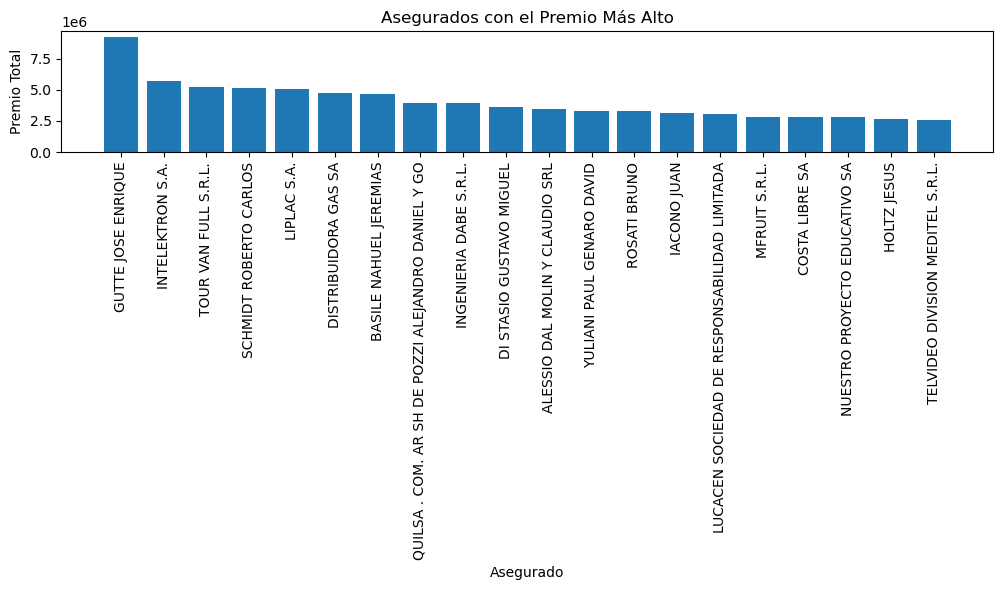

In [18]:
#5 20 asegurados que pagan el premio más alto, por sumatoria de pólizas o por pólizas individuales
asegurados_premio_mas_alto = df.groupby(df.columns[7])[df.columns[18]].sum().reset_index().sort_values(by=df.columns[18], ascending=False).head(20)
print("\n20 asegurados que pagan el premio más alto:")
print(asegurados_premio_mas_alto)

# Gráfico de barras para asegurados con el premio más alto
plt.figure(figsize=(10,6))
plt.bar(asegurados_premio_mas_alto[df.columns[7]], asegurados_premio_mas_alto[df.columns[18]])
plt.title('Asegurados con el Premio Más Alto')
plt.xlabel('Asegurado')
plt.ylabel('Premio Total')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


20 asegurados que generan más comisión:
                            Asegurado  ComisiÃ³n cobranza
1829               GUTTE JOSE ENRIQUE           182945.29
1943                 INTELEKTRON S.A.           131134.07
3767             TOUR VAN FULL S.R.L.           124793.91
3461           SCHMIDT ROBERTO CARLOS           123206.60
395            BASILE NAHUEL JEREMIAS           112144.01
1174             DISTRIBUIDORA GAS SA           109908.33
2138                      LIPLAC S.A.           100440.35
1118         DI STASIO GUSTAVO MIGUEL            87911.24
3991        YULIANI PAUL GENARO DAVID            84887.95
114   ALESSIO DAL MOLIN Y CLAUDIO SRL            80531.45
3288                     ROSATI BRUNO            78794.96
3726         TOMINICH MARCELO ORLANDO            67337.19
1889                      HOLTZ JESUS            66213.83
2620     MOSCOSO AVALOS ISMAEL JUNIOR            62752.95
1944             INVERSORA LUNEGAT SA            62435.71
3019                         PR

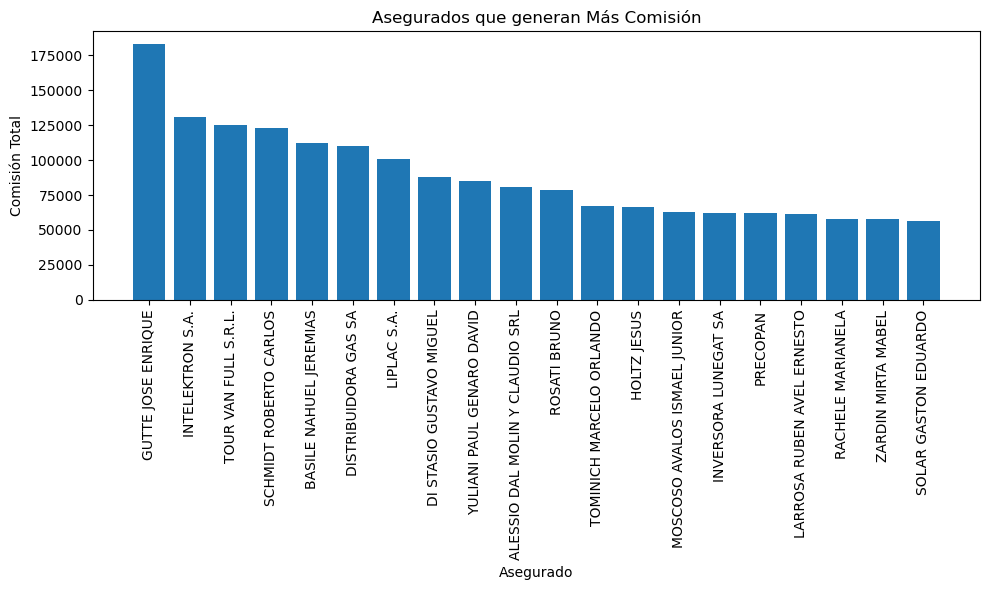

In [19]:
#6 20 asegurados que nos da más comisión (20 asegurados de Columna 8 Asegurado - con premio más alto en Columna 21 Comision cobranza)
asegurados_mas_comision = df.groupby(df.columns[7])[df.columns[20]].sum().reset_index().sort_values(by=df.columns[20], ascending=False).head(20)
print("\n20 asegurados que generan más comisión:")
print(asegurados_mas_comision)

# Gráfico de barras para asegurados con más comisión
plt.figure(figsize=(10,6))
plt.bar(asegurados_mas_comision[df.columns[7]], asegurados_mas_comision[df.columns[20]])
plt.title('Asegurados que generan Más Comisión')
plt.xlabel('Asegurado')
plt.ylabel('Comisión Total')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()